In [1]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm

import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。




from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu

import pandas as pd


In [2]:
# 读取 CSV 文件到 DataFrame
df1 = pd.read_csv('Cov_X_X_gpu.csv', header=None)
df2 = pd.read_csv('Cov_X_X_cpu.csv', header=None)

# 将 DataFrame 转换为 NumPy 矩阵
Cov_X_X_gpu = df1.values
Cov_X_X_cpu = df2.values

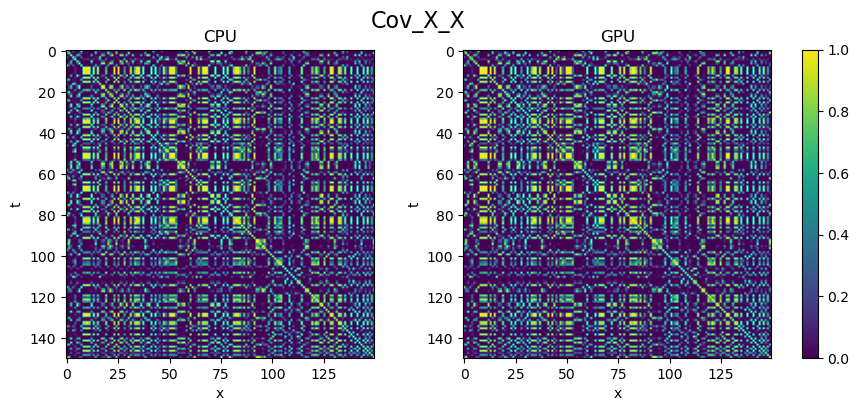

In [3]:
# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(Cov_X_X_cpu)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU')

# 绘制第二幅图像
im1 = axes[1].imshow(Cov_X_X_gpu)
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('GPU')


# 为所有子图添加一个共享的颜色条
fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('Cov_X_X', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

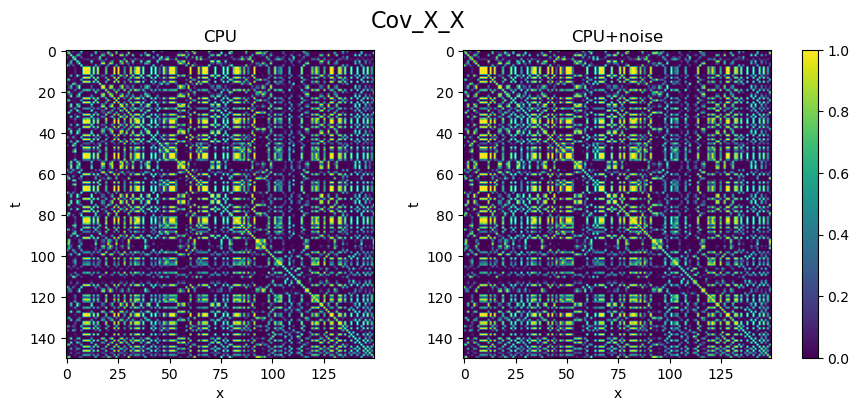

In [4]:
small_matrix = np.random.uniform(low=0, high=1e-7, size=Cov_X_X_cpu.shape)
# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(Cov_X_X_cpu)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU')

# 绘制第二幅图像
im1 = axes[1].imshow(Cov_X_X_cpu+small_matrix)
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('CPU+noise')


# 为所有子图添加一个共享的颜色条
fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('Cov_X_X', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
def calculate_inverse_cpu(Matrix, xishu=100000000):
    rho_orig = Matrix #X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X，将其赋值给rho_orig
    rho = rho_orig*xishu # 将X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X（现在是rho_orig）放大xishu倍，得到rho
    u, s, v = np.linalg.svd(rho) #对放大后的协方差矩阵rho进行奇异值分解，得到矩阵u，奇异值向量s和矩阵v，具体rho = u * np.diag(s) * v.T
    inv_s=np.linalg.inv(np.diag(s)) #计算奇异值向量s对角矩阵的逆矩阵inv_s
    t1= np.matmul(v.T, inv_s) #将矩阵v的转置与逆奇异值矩阵inv_s相乘，得到中间结果 t1
    t2= np.matmul(t1, u.T) #将中间结果t1与矩阵u的转置相乘，得到中间结果t2
    # Check whether the obtained inverse matrix is correct. If it is the identity matrix, it means there is no problem.
    # t3= np.matmul(t2, rho) #将中间结果t2与矩阵rho相乘，得到结果t3。如果t2是rho的正确逆矩阵，那么t3应该是一个单位矩阵（即对角线元素为1，其余元素为0）
    # Inverse of covariance matrix
    inv_rho = t2*xishu  #将中间结果t2的每个元素乘以放大常数xishu，得到原始协方差矩阵rho_orig（即X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X）的逆矩阵 inv_rho
    return inv_rho



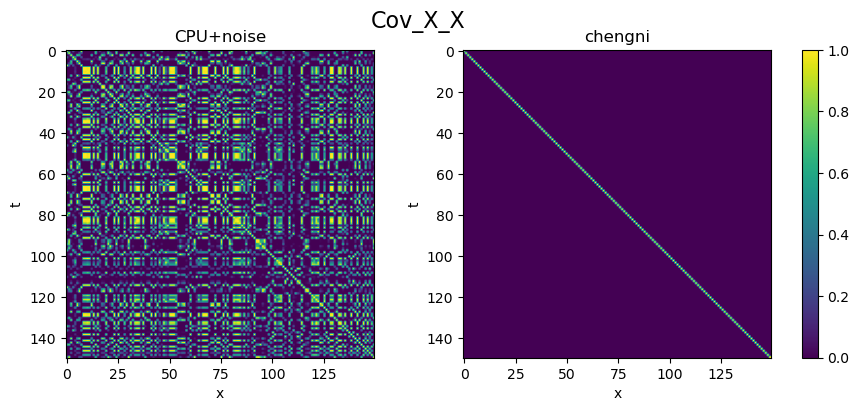

In [6]:
small_matrix = np.random.uniform(low=0, high=1e-12, size=Cov_X_X_cpu.shape)
# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(Cov_X_X_cpu+small_matrix)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU+noise')

# 绘制第二幅图像
im1 = axes[1].imshow(np.matmul((Cov_X_X_cpu+small_matrix),calculate_inverse_cpu(Cov_X_X_cpu+small_matrix)))
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('chengni')


# 为所有子图添加一个共享的颜色条
fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('Cov_X_X', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

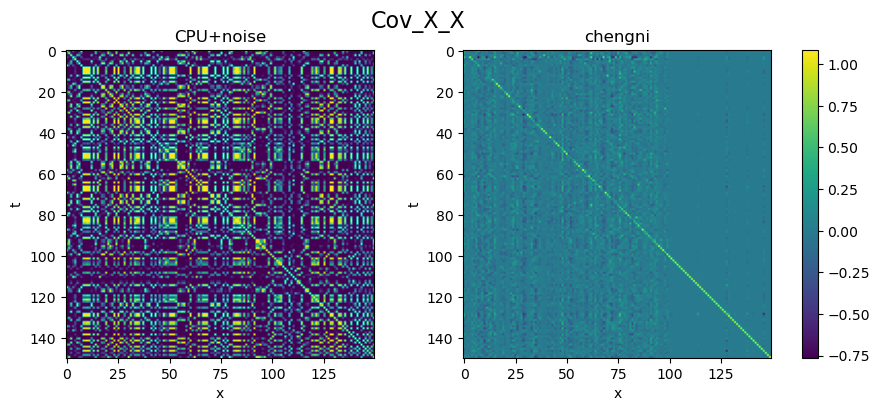

[[ 5.97435918e-01  3.09055755e-02 -1.12159643e-02 ... -9.76088614e-08
   4.23385387e-07  6.57405508e-07]
 [ 2.77761042e-01 -1.81163810e-02  1.37422469e-01 ... -3.45476678e-08
  -1.03985649e-06  1.39792974e-07]
 [ 1.21830987e-01 -3.54770920e-02  2.70870634e-02 ...  6.60076225e-08
  -1.63650844e-07  1.79693018e-07]
 ...
 [-8.49143104e-02 -1.21075505e-02 -4.16835637e-02 ...  1.00000002e+00
  -3.16701995e-07 -8.51286615e-08]
 [ 9.37688694e-02  2.36192221e-02 -9.24052385e-03 ...  1.01680501e-07
   9.99999531e-01  1.24748798e-07]
 [ 2.93989241e-01 -1.61672216e-02  1.48836546e-01 ... -4.00154931e-08
  -5.28564442e-07  9.99999869e-01]]


In [7]:

# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(Cov_X_X_gpu)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU+noise')

# 绘制第二幅图像
im1 = axes[1].imshow(np.matmul(Cov_X_X_gpu,calculate_inverse_cpu(Cov_X_X_gpu)))
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('chengni')


# 为所有子图添加一个共享的颜色条
fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('Cov_X_X', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(np.matmul(Cov_X_X_gpu,calculate_inverse_cpu(Cov_X_X_gpu)))

In [8]:
error = Cov_X_X_cpu - Cov_X_X_gpu

In [9]:
xin = Cov_X_X_cpu - error
Cov_X_X_cpu == xin

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

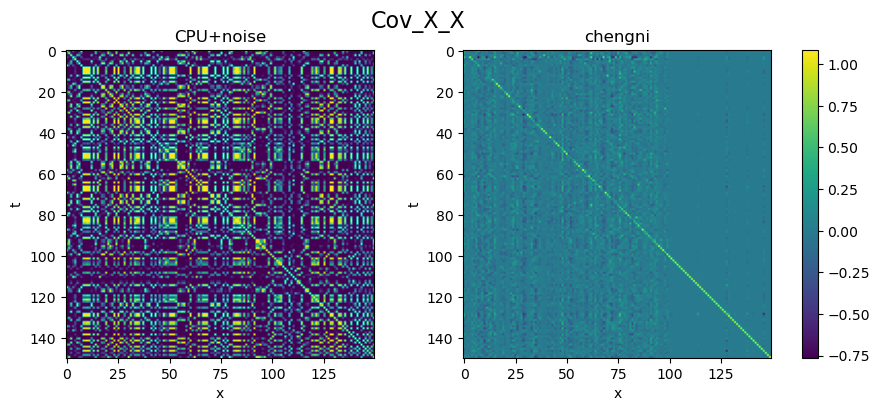

In [10]:

# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(xin)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU+noise')

# 绘制第二幅图像
im1 = axes[1].imshow(np.matmul(xin,calculate_inverse_cpu(xin)))
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('chengni')


# 为所有子图添加一个共享的颜色条
fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('Cov_X_X', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

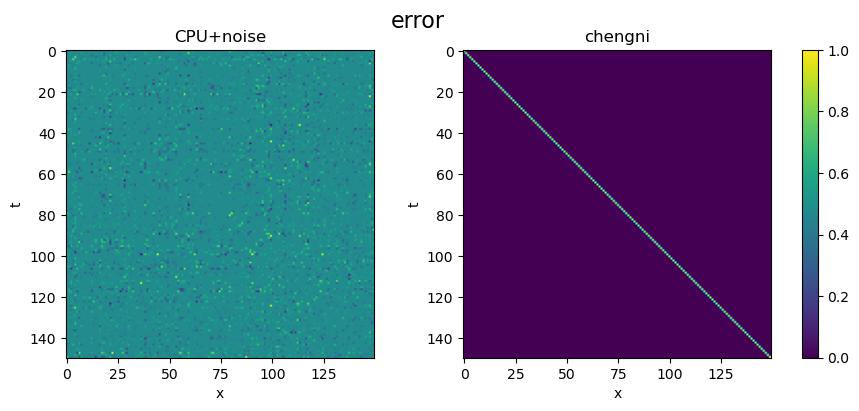

[[ 0.00000000e+00 -6.33891661e-09  8.26386240e-11 ... -2.55458986e-11
   9.80980000e-11  3.84488423e-08]
 [-6.33891661e-09  0.00000000e+00  1.33698440e-09 ... -1.32215301e-10
   1.15503881e-11  7.45294826e-10]
 [ 8.26386240e-11  1.33698440e-09  0.00000000e+00 ...  2.52489157e-09
   3.40302366e-15 -8.33096820e-09]
 ...
 [-2.55458986e-11 -1.32215301e-10  2.52489157e-09 ...  0.00000000e+00
   9.79991360e-13  5.75918800e-10]
 [ 9.80980000e-11  1.15503881e-11  3.40302366e-15 ...  9.79991360e-13
   0.00000000e+00  4.37307405e-11]
 [ 3.84488423e-08  7.45294826e-10 -8.33096820e-09 ...  5.75918800e-10
   4.37307405e-11  0.00000000e+00]]


In [11]:

# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(error)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU+noise')

# 绘制第二幅图像
im1 = axes[1].imshow(np.matmul(error,calculate_inverse_cpu(error)))
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('chengni')


# 为所有子图添加一个共享的颜色条
fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('error', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(error)

In [12]:
# 获取 Cov_X_X_cpu 的形状
shape = Cov_X_X_cpu.shape

# 生成一个对角线元素为1的对称矩阵
matrix = np.random.uniform(low=0, high=1, size=shape)
matrix = (matrix + matrix.T) / 2  # 确保矩阵对称
np.fill_diagonal(matrix, 1)

# 确保矩阵是 float64 类型
matrix = matrix.astype(np.float64)

# 使矩阵成为奇异矩阵（例如，通过将最后一行设置为前几行的线性组合）
matrix[-1] = matrix[0] + matrix[1]

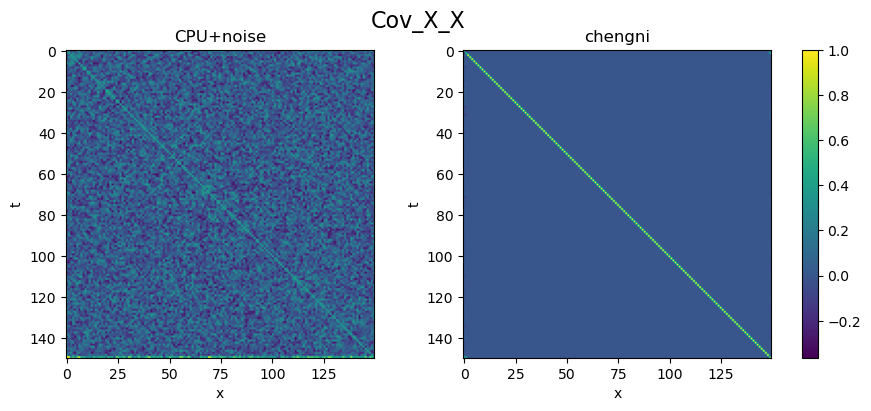

In [13]:

# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(matrix)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU+noise')

# 绘制第二幅图像
im1 = axes[1].imshow(np.matmul(matrix,calculate_inverse_cpu(matrix)))
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('chengni')


# 为所有子图添加一个共享的颜色条
fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('Cov_X_X', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

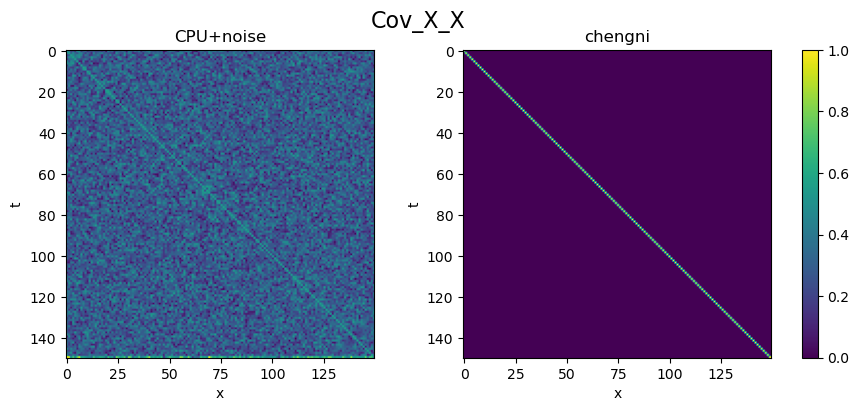

In [14]:

# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(error+matrix)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU+noise')

# 绘制第二幅图像
im1 = axes[1].imshow(np.matmul(error+matrix,calculate_inverse_cpu(error+matrix)))
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('chengni')


# 为所有子图添加一个共享的颜色条
fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('Cov_X_X', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

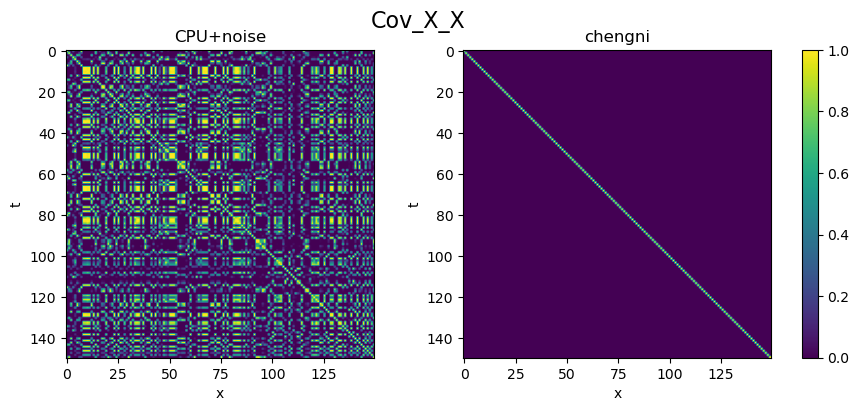

In [15]:

# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(Cov_X_X_gpu-error)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU+noise')

# 绘制第二幅图像
im1 = axes[1].imshow(np.matmul(Cov_X_X_gpu-error,calculate_inverse_cpu(Cov_X_X_gpu-error)))
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('chengni')


# 为所有子图添加一个共享的颜色条
fig.colorbar(im1, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('Cov_X_X', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [19]:
# 将 NumPy 矩阵转换为 PyTorch 张量
tensor = torch.tensor(Cov_X_X_cpu, dtype=torch.float64).cuda()

tensor = tensor * 1.0

# 将 PyTorch 张量转换回 NumPy 矩阵
numpy_matrix = tensor.cpu().numpy()

print(numpy_matrix == Cov_X_X_cpu)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [ ]:
#计算不确定度（基于高斯过程和谱归一化）
def Cov_matrix_cpu(X, gamma):
    n = X.shape[0]
    Cov_x_x = np.zeros(shape=(n,n), dtype=float)
    # for i in range(n):
    for i in tqdm(range(n), desc="ncross"):
        for j in range(n):
            xi = X[i:i+1,:]
            xj = X[j:j+1,:]
            dij = np.sum((xi-xj)**2)
            Cov_x_x[i][j] = np.exp(-gamma*dij)
    return Cov_x_x

#计算不确定度（基于高斯过程和谱归一化）
def Cov_matrix_gpu1(X, gamma):
    # 将输入数据转换为 PyTorch 张量，并移动到 GPU 上
    X = torch.tensor(X, dtype=torch.float64).cuda()
    gamma = torch.tensor(gamma, dtype=torch.float64).cuda()

    n = X.shape[0]
    Cov_x_x = torch.zeros((n, n), dtype=torch.float64).cuda()

    for i in tqdm(range(n), desc="ncross"):
        xi = X[i:i+1, :]
        dij = torch.sum((xi - X) ** 2, dim=1)
        Cov_x_x[i, :] = torch.exp(-gamma * dij)

    # 将结果从 GPU 移动到 CPU，并转换为 NumPy 数组
    return Cov_x_x.cpu().numpy()

In [ ]:
xishu = 1

rho_orig = Cov_X_X_cpu #X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X，将其赋值给rho_orig
rho = rho_orig*xishu # 将X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X（现在是rho_orig）放大xishu倍，得到rho
u, s, v = np.linalg.svd(rho) #对放大后的协方差矩阵rho进行奇异值分解，得到矩阵u，奇异值向量s和矩阵v，具体rho = u * np.diag(s) * v.T
inv_s=np.linalg.inv(np.diag(s)) #计算奇异值向量s对角矩阵的逆矩阵inv_s
t1= np.matmul(v.T, inv_s) #将矩阵v的转置与逆奇异值矩阵inv_s相乘，得到中间结果 t1
t2= np.matmul(t1, u.T) #将中间结果t1与矩阵u的转置相乘，得到中间结果t2
# # Check whether the obtained inverse matrix is correct. If it is the identity matrix, it means there is no problem.
# # t3= np.matmul(t2, rho) #将中间结果t2与矩阵rho相乘，得到结果t3。如果t2是rho的正确逆矩阵，那么t3应该是一个单位矩阵（即对角线元素为1，其余元素为0）
# # Inverse of covariance matrix
inv_rho = t2*xishu  #将中间结果t2的每个元素乘以放大常数xishu，得到原始协方差矩阵rho_orig（即X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X）的逆矩阵 inv_rho
    


# 将矩阵移动到 GPU
Matrix = torch.tensor(Cov_X_X_cpu, dtype=torch.float64).cuda()
rho_Matrix = Matrix * xishu  # 将X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X（现在是rho_orig）放大xishu倍，得到rho
# # 对放大后的协方差矩阵rho进行奇异值分解
u_Matrix, s_Matrix, v_Matrix = torch.linalg.svd(rho_Matrix)
inv_s_Matrix = torch.linalg.inv(torch.diag(s_Matrix))  # 计算奇异值向量s对角矩阵的逆矩阵inv_s
# t1_Matrix = torch.matmul(v_Matrix.t(), inv_s_Matrix)  # 将矩阵v的转置与逆奇异值矩阵inv_s相乘，得到中间结果 t1
# t2_Matrix = torch.matmul(t1_Matrix, u_Matrix.t())  # 将中间结果t1与矩阵u的转置相乘，得到中间结果t2
# # # Inverse of covariance matrix
# inv_rho_Matrix = t2_Matrix * xishu  # 将中间结果t2的每个元素乘以放大常数xishu，得到原始协方差矩阵rho_orig（即X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X）的逆矩阵 inv_rho
    

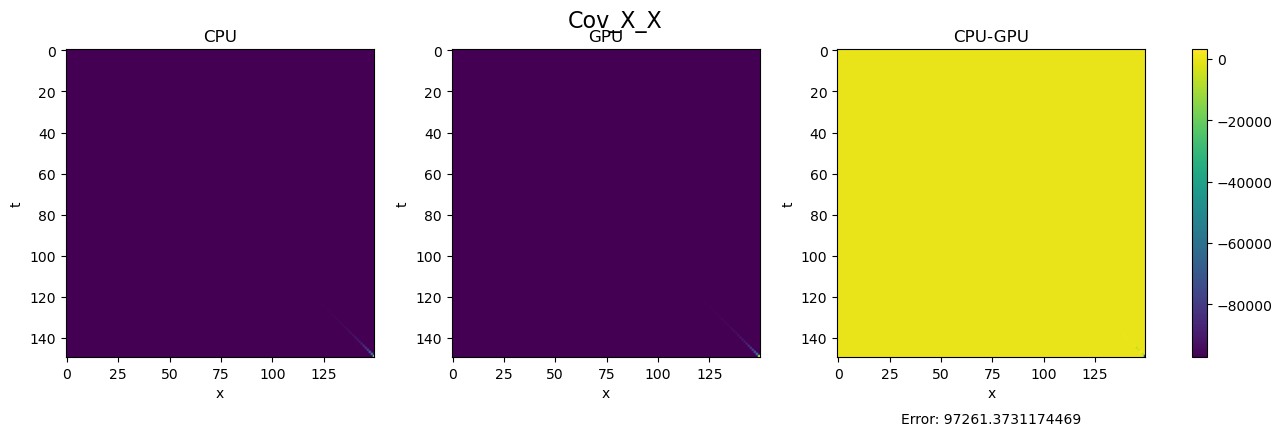

In [73]:
# a = np.diag(s)
# b = np.diag(s_Matrix.cpu().numpy())
a = inv_s
b = inv_s_Matrix.cpu().numpy()

# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(a)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU')
# axes[0].text(0.5, -0.2, f'Error: {np.abs(Cov_X_X_cpu-Cov_X_X_gpu1).max()}', ha='center', va='center', transform=axes[0].transAxes)


# 绘制第二幅图像
im1 = axes[1].imshow(b)
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('GPU')
# axes[1].text(0.5, -0.2, f'Error: {np.abs(Cov_X_X_gpu1-Cov_X_X_gpu).max()}', ha='center', va='center', transform=axes[1].transAxes)

# 绘制第三幅图像
im2 = axes[2].imshow(a-b)
axes[2].set_xlabel('x')
axes[2].set_ylabel('t')
axes[2].set_title('CPU-GPU')
axes[2].text(0.5, -0.2, f'Error: {np.abs(a-b).max()}', ha='center', va='center', transform=axes[2].transAxes)

# 为所有子图添加一个共享的颜色条
fig.colorbar(im2, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('Cov_X_X', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [105]:
def inverse_gpu(X):
    # 将输入数据转换为 PyTorch 张量，并移动到 GPU 上
    X = torch.tensor(X, dtype=torch.float64).cuda()

    X_inverse = torch.pinverse(X)


    # 将结果从 GPU 移动到 CPU，并转换为 NumPy 数组
    return X_inverse.cpu().numpy()
# def inverse_gpu(X):
#     A = torch.tensor(X, dtype=torch.float64).cuda()
#     eigvals, eigvecs = torch.linalg.eigh(A)  # 特征分解
#     eigvals_inv = torch.where(eigvals > 1e-5, 1.0 / eigvals, torch.zeros_like(eigvals))  # 截断小特征值
#     A_inv_approx = eigvecs @ torch.diag(eigvals_inv) @ eigvecs.T  # 重构近似逆矩阵
#     return A_inv_approx.cpu().numpy()

def inverse_cpu(Matrix, xishu=100000000):
    rho_orig = Matrix #X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X，将其赋值给rho_orig
    rho = rho_orig*xishu # 将X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X（现在是rho_orig）放大xishu倍，得到rho
    u, s, v = np.linalg.svd(rho) #对放大后的协方差矩阵rho进行奇异值分解，得到矩阵u，奇异值向量s和矩阵v，具体rho = u * np.diag(s) * v.T
    inv_s=np.linalg.inv(np.diag(s)) #计算奇异值向量s对角矩阵的逆矩阵inv_s
    t1= np.matmul(v.T, inv_s) #将矩阵v的转置与逆奇异值矩阵inv_s相乘，得到中间结果 t1
    t2= np.matmul(t1, u.T) #将中间结果t1与矩阵u的转置相乘，得到中间结果t2
    # Check whether the obtained inverse matrix is correct. If it is the identity matrix, it means there is no problem.
    # t3= np.matmul(t2, rho) #将中间结果t2与矩阵rho相乘，得到结果t3。如果t2是rho的正确逆矩阵，那么t3应该是一个单位矩阵（即对角线元素为1，其余元素为0）
    # Inverse of covariance matrix
    inv_rho = t2*xishu  #将中间结果t2的每个元素乘以放大常数xishu，得到原始协方差矩阵rho_orig（即X（训练点的高斯过程层的常规输出）的协方差矩阵Cov_X_X）的逆矩阵 inv_rho
    return inv_rho




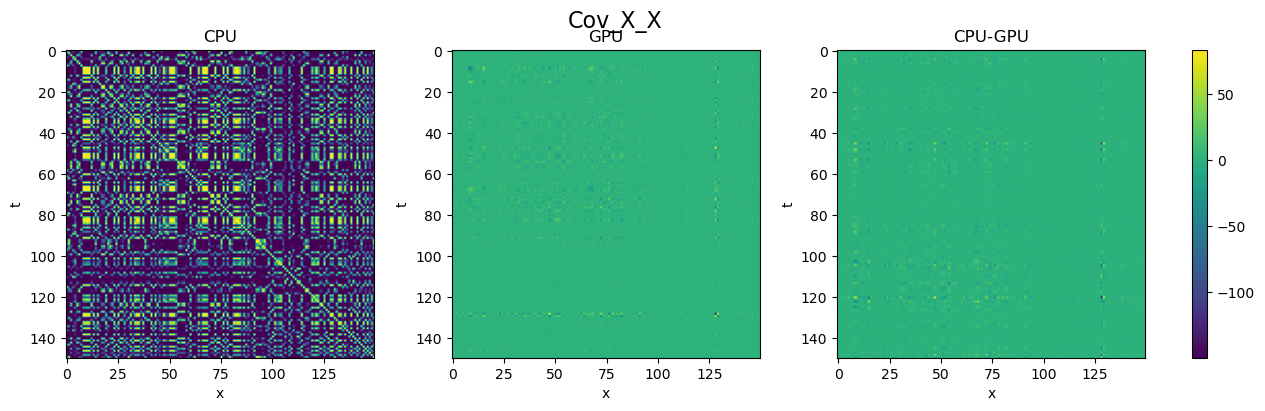

[[ 5.34361319e-01 -1.69855749e-02 -9.60209989e-04 ...  4.40560974e-08
  -3.06042054e-07  2.68302529e-07]
 [-1.86648611e-02  3.72347298e-01 -3.05522699e-04 ... -3.20525970e-08
   3.39744076e-07 -1.66845439e-07]
 [-2.15355650e-03 -5.23408824e-04  4.21881315e-01 ... -6.69550042e-08
   6.15172215e-08 -4.83377605e-07]
 ...
 [-1.02782226e-03  2.06023251e-05  1.02304708e-04 ...  1.00000000e+00
   2.99902165e-08 -3.26632943e-08]
 [ 6.75637810e-04 -1.78133292e-04  1.19291012e-04 ...  1.97952858e-09
   1.00000019e+00 -1.50313491e-09]
 [-4.96206805e-04  9.96065792e-05 -1.99312344e-05 ... -2.00346051e-09
   3.47701075e-07  1.00000000e+00]]


In [110]:


# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(Cov_X_X_gpu)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU')
# axes[0].text(0.5, -0.2, f'Error: {np.abs(Cov_X_X_cpu-Cov_X_X_gpu1).max()}', ha='center', va='center', transform=axes[0].transAxes)


# 绘制第二幅图像
im1 = axes[1].imshow(inverse_cpu(Cov_X_X_cpu))
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('GPU')
# axes[1].text(0.5, -0.2, f'Error: {np.abs(Cov_X_X_gpu1-Cov_X_X_gpu).max()}', ha='center', va='center', transform=axes[1].transAxes)

# 绘制第三幅图像
im2 = axes[2].imshow(np.matmul(Cov_X_X_gpu,inverse_cpu(Cov_X_X_cpu)))
axes[2].set_xlabel('x')
axes[2].set_ylabel('t')
axes[2].set_title('CPU-GPU')
# axes[2].text(0.5, -0.2, f'Error: {np.abs(a-b).max()}', ha='center', va='center', transform=axes[2].transAxes)

# 为所有子图添加一个共享的颜色条
fig.colorbar(im2, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('Cov_X_X', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(np.matmul(Cov_X_X_gpu,inverse_gpu(Cov_X_X_gpu)))

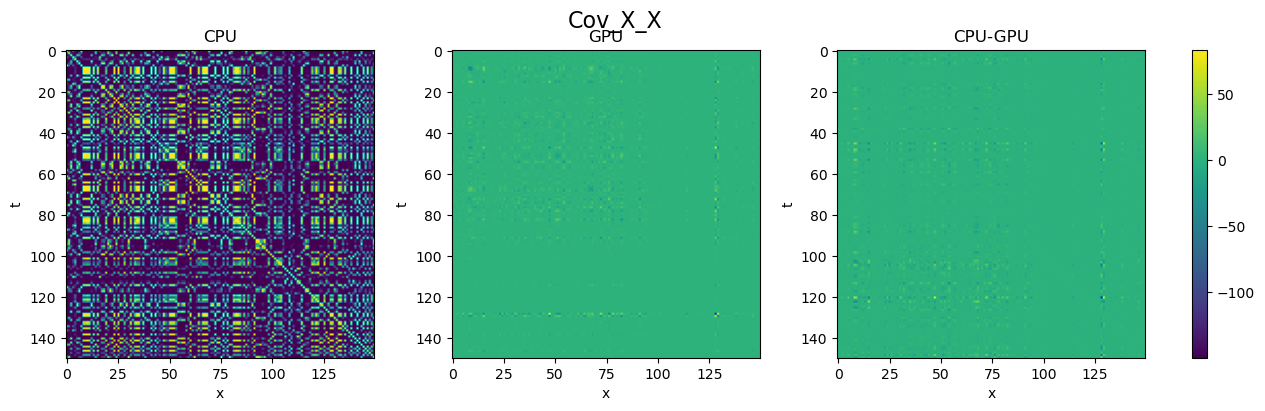

[[ 9.99999717e-01  2.96688086e-07 -2.52384780e-09 ...  1.54901869e-10
   1.61529456e-10  8.46114290e-10]
 [-5.36005246e-07  1.00000023e+00 -1.38923497e-07 ... -1.72043713e-10
  -1.84080307e-10  1.37265488e-09]
 [-2.42056103e-07  3.87472028e-08  9.99999614e-01 ... -3.83650667e-10
  -9.04275321e-10  2.03215222e-11]
 ...
 [-4.19049684e-09  4.00814315e-08 -2.43528575e-09 ...  1.00000000e+00
   1.68880798e-10  9.12052656e-11]
 [-3.46260160e-07  3.00051775e-08  3.88744082e-07 ...  4.21477345e-10
   1.00000000e+00  2.02724216e-09]
 [-4.25498001e-07  1.66866812e-07 -1.03791535e-07 ... -1.27641897e-10
  -1.46755497e-10  1.00000000e+00]]


In [ ]:


# 创建一个包含三幅子图的图像
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 绘制第一幅图像
im0 = axes[0].imshow(Cov_X_X_cpu)
axes[0].set_xlabel('x')
axes[0].set_ylabel('t')
axes[0].set_title('CPU')
# axes[0].text(0.5, -0.2, f'Error: {np.abs(Cov_X_X_cpu-Cov_X_X_gpu1).max()}', ha='center', va='center', transform=axes[0].transAxes)


# 绘制第二幅图像
im1 = axes[1].imshow(inverse_gpu(Cov_X_X_cpu))
axes[1].set_xlabel('x')
axes[1].set_ylabel('t')
axes[1].set_title('GPU')
# axes[1].text(0.5, -0.2, f'Error: {np.abs(Cov_X_X_gpu1-Cov_X_X_gpu).max()}', ha='center', va='center', transform=axes[1].transAxes)

# 绘制第三幅图像
im2 = axes[2].imshow(np.matmul(Cov_X_X_cpu,inverse_gpu(Cov_X_X_cpu)))
axes[2].set_xlabel('x')
axes[2].set_ylabel('t')
axes[2].set_title('CPU-GPU')
# axes[2].text(0.5, -0.2, f'Error: {np.abs(a-b).max()}', ha='center', va='center', transform=axes[2].transAxes)

# 为所有子图添加一个共享的颜色条
fig.colorbar(im2, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

# 为整个图像添加总标题
fig.suptitle('Cov_X_X', fontsize=16)

# 自动调整子图参数，使得子图之间的间距适当
# plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(np.matmul(Cov_X_X_cpu,inverse_gpu(Cov_X_X_cpu)))

In [113]:
print(inverse_gpu(Cov_X_X_cpu))

[[-6.38065945e+07  1.53184719e+07 -1.68043883e+07 ... -1.74707329e+04
   1.47014202e+03  1.26861088e+05]
 [ 1.53184477e+07  2.26987018e+06 -1.54031641e+07 ... -1.76039598e+04
  -6.19953740e+03 -9.20294353e+04]
 [-1.68044464e+07 -1.54031373e+07  7.71953653e+06 ... -5.71484103e+03
  -6.21854574e+03  2.96573934e+04]
 ...
 [-1.74708186e+04 -1.76039259e+04 -5.71486606e+03 ...  3.40281700e+02
  -5.87725238e+00  5.60343766e+01]
 [ 1.46994779e+03 -6.19948957e+03 -6.21868293e+03 ... -5.87736801e+00
   3.62594378e+02  5.67000789e+01]
 [ 1.26860847e+05 -9.20294163e+04  2.96571341e+04 ...  5.60340788e+01
   5.66997201e+01  1.85185385e+03]]


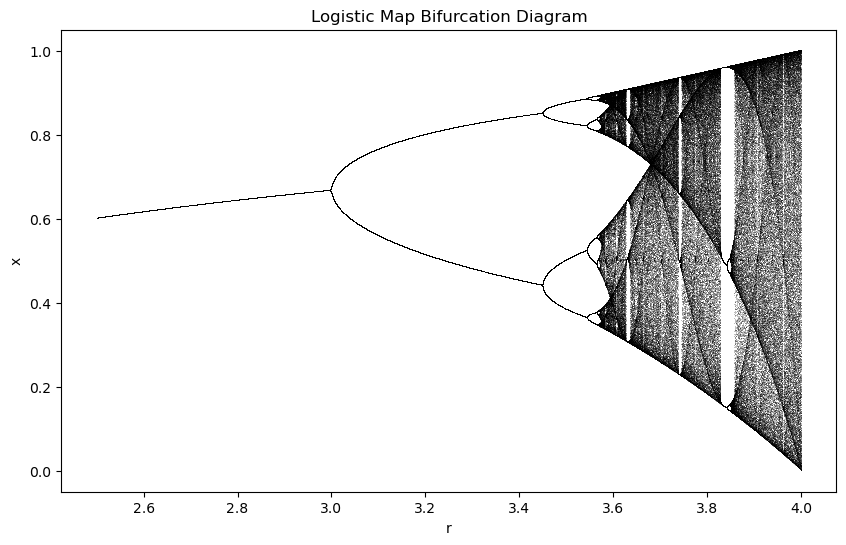

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 Logistic 映射函数
def logistic_map(r, x):
    return r * x * (1 - x)

# 参数设置
r_values = np.linspace(2.5, 4.0, 10000)  # r 参数的范围
num_iterations = 1000  # 迭代次数
last_iterations = 100  # 用于绘制的最后几次迭代

# 初始化数组
x = np.ones(len(r_values)) * 0.5  # 初始值

# 创建图像
plt.figure(figsize=(10, 6))

# 进行迭代并绘制分叉图
for i in range(num_iterations):
    x = logistic_map(r_values, x)
    if i >= (num_iterations - last_iterations):
        plt.plot(r_values, x, ',k', alpha=0.25)  # 使用逗号标记绘制

plt.title("Logistic Map Bifurcation Diagram")
plt.xlabel("r")
plt.ylabel("x")
plt.show()